### chapter 4 - training models

In [1]:

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / 'images'/'training_linear_models'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig (fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
    path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format= fig_extension, dpi = resolution)

## Linear regression

### The normal equation 

In [3]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 *np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)

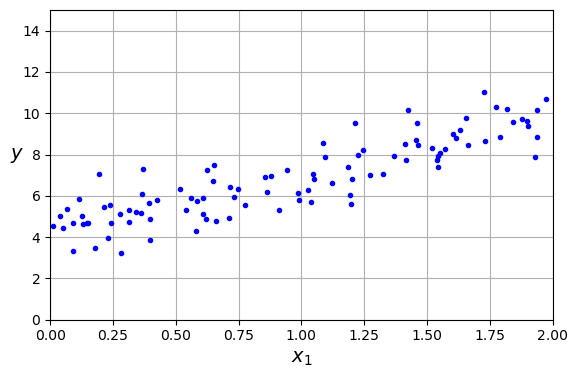

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
save_fig('generated_data_plot')
plt.show()

In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
thetha_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [7]:
thetha_best

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ thetha_best
y_predict

array([[4.21509616],
       [9.75532293]])

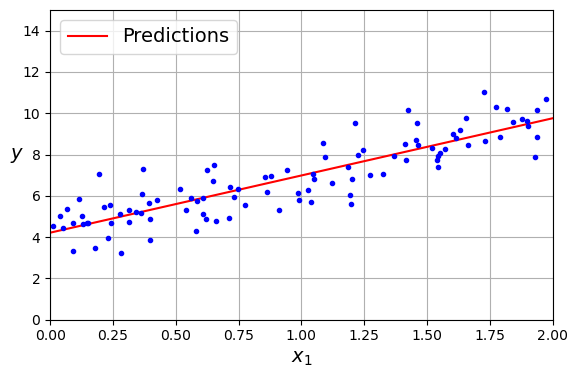

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(X_new, y_predict,'r-', label = 'Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc='upper left')
save_fig('linear_model_predictions_plot')

plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [12]:
thetha_best_svd , residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6)
thetha_best_svd

array([[4.21509616],
       [2.77011339]])

this function computes X+y where X+ is the pseudoinverse of X (Moore-Penrose inverse).Use np.linalg.pinv() to compute the pseudoinverse directly

In [13]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])